In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [4]:
#Physics parameters
#G,Mt,Ml,dTL,w
constantes = [6.67e-11,5.9736e24,0.07349e24,3.844e8, 2.6617e-6]

In [46]:

t = np.linspace(0,20000,1000000)

In [47]:
def System(R,t,param):
    
    r,phi,p_r,p_phi = R
    Delta = param[0]*param[1]/param[3]**3
    mu = param[2]/param[1]
    r_prima = np.sqrt(1+r**2-2*r*np.cos(phi-param[4]*t))
    
    drdt = p_r
    dphidt = p_phi/r**2 
    dp_rdt = (p_phi**2/r**3) - Delta*(1/r**2 + (mu/r_prima**3)*(r-np.cos(phi-param[4]*t)))
    dp_phidt = -(Delta*mu*r/r_prima**3)*np.sin(phi-param[4]*t)
    
    return [drdt,dphidt,dp_rdt,dp_phidt]

In [83]:
v_scape = 11.5e3/constantes[3]
phi_0 = 10*np.pi/180
theta_0 = 90 *np.pi/180
r0 = 6.371e6/constantes[3]

R0 = [r0, phi_0, v_scape*np.cos(theta_0-phi_0), v_scape*r0*np.sin(theta_0-phi_0)]

In [84]:
sol = integrate.odeint(System, R0, t, args=(constantes,))

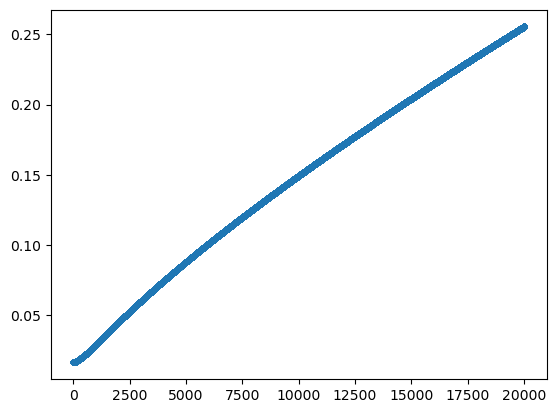

In [85]:
plt.scatter(t,sol[:,0],marker=".")

In [86]:
def Integrator2(f,R0,t,param):
    
    h = t[1] - t[0]
    print(h)
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    p_r = np.zeros_like(t)
    p_phi = np.zeros_like(t)
    
    r[0] = R0[0]
    phi[0] = R0[1]
    p_r[0] = R0[2]
    p_phi[0] = R0[4]

    for i in range(1,len(t)):
        
        R = np.array([r[i-1],phi[i-1],p_r[i-1],p_phi[i-1]])
        
        K1 = f(R,t[i-1],param)
        
        R = np.array([r[i-1]+0.5*h*K1[0],phi[i-1]+0.5*h*K1[1],
                      p_r[i-1]+0.5*h*K1[2],p_phi[i-1]+0.5*h*K1[3]])
        
        K2 = f(R,t[i-1]+0.5*h,param)
        
        R = np.array([x[i-1]+0.5*h*K2[0],y[i-1]+0.5*h*K2[1],z[i-1]+0.5*h*K2[2],
                      vx[i-1]+0.5*h*K2[3],vy[i-1]+0.5*h*K2[4],vz[i-1]+0.5*h*K2[5]])
        
        K3 = f(R,t[i-1]+0.5*h,param)
        
        R = np.array([x[i-1]+h*K3[0],y[i-1]+h*K3[1],z[i-1]+h*K3[2],
                      vx[i-1]+h*K3[3],vy[i-1]+h*K3[4],vz[i-1]+h*K3[5]])
        
        K4 = f(R,t[i-1]+h,param)
        
        x[i] = x[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        y[i] = y[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        z[i] = z[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
        
        vx[i] = vx[i-1] + (1/6)*h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
        vy[i] = vy[i-1] + (1/6)*h*(K1[4]+2*K2[4]+2*K3[4]+K4[4])
        vz[i] = vz[i-1] + (1/6)*h*(K1[5]+2*K2[5]+2*K3[5]+K4[5])
        
    return x,y,z,vx,vy,vz

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1637464332.py, line 19)

In [54]:
theta = 30*np.pi/180

In [55]:
x,y,z,vx,vy,vz = Integrator2(System,r0,t,omega)

0.02002002002002002


In [56]:
r = integrate.odeint(System,r0,t,args=(omega,))

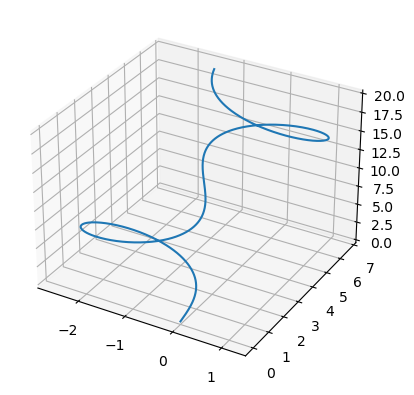

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
#ax.plot(r[:,0],r[:,1],r[:,2])